In [1]:
from qa_qc_lib.qa_qc_seismic import QA_QC_seismic

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length):
    if num_sides < 3:
        raise ValueError("A polygon must have at least 3 sides.")

    # Generate random side lengths
    side_lengths = np.random.uniform(min_side_length, max_side_length, num_sides)

    # Calculate the total perimeter of the polygon
    total_perimeter = np.sum(side_lengths)

    # Calculate the angles between the sides
    angles = np.random.uniform(0, 360, num_sides)

    # Generate the cumulative angles for vertex positions
    cumulative_angles = np.cumsum(angles)

    # Generate the coordinates of the polygon vertices
    x_coords = total_perimeter * np.cos(np.radians(cumulative_angles))
    y_coords = total_perimeter * np.sin(np.radians(cumulative_angles))

    # Close the polygon
    x_coords = np.append(x_coords, x_coords[0])
    y_coords = np.append(y_coords, y_coords[0])

    # Check if any of the sides intersect, and if so, regenerate the polygon
    for i in range(num_sides):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % num_sides], y_coords[(i + 1) % num_sides]
        for j in range(i + 2, num_sides):
            x3, y3 = x_coords[j], y_coords[j]
            x4, y4 = x_coords[(j + 1) % num_sides], y_coords[(j + 1) % num_sides]
            if do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
                return generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

    return x_coords, y_coords

def do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    # Check if two line segments intersect using the cross product method
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1

    d1 = cross_product(x4 - x3, y4 - y3, x1 - x3, y1 - y3)
    d2 = cross_product(x4 - x3, y4 - y3, x2 - x3, y2 - y3)
    d3 = cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    d4 = cross_product(x2 - x1, y2 - y1, x4 - x1, y4 - y1)

    if (d1 * d2 < 0) and (d3 * d4 < 0):
        return True
    return False


def add_noise_to_polygon(polygon_points, noise_factor=0.1):
    x_coords, y_coords = zip(*polygon_points)
    noise_x = np.random.uniform(-noise_factor, noise_factor, len(x_coords))
    noise_y = np.random.uniform(-noise_factor, noise_factor, len(y_coords))

    x_coords_noisy = [x + noise for x, noise in zip(x_coords, noise_x)]
    y_coords_noisy = [y + noise for y, noise in zip(y_coords, noise_y)]

    return list(zip(x_coords_noisy, y_coords_noisy))
    

def build_polygon_from_points(x_coords, y_coords):
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    rectangle_points = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_points

In [3]:
file_path = 'data/Глубинный куб NP cropped'
#file_path = 'data/Временной куб NP cropped'

# Example usage:
num_sides = 5
min_side_length = 1
max_side_length = 5
x_coords, y_coords = generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

license_area_poly = list(zip(x_coords*5000, y_coords*500))
license_area_poly

[(25206.338982990354, 4761.037026880889),
 (36505.04035440562, 3961.677562323464),
 (39995.20659021207, 3609.0030920806353),
 (-11899.743040749401, -5254.0489126221855),
 (-26162.701521573894, -4709.161211034865),
 (25206.338982990354, 4761.037026880889)]

In [4]:
surfaces_path_list = ['data/seismic_data/TWT_NP4', 'data/seismic_data/TWT_NP']

seism_data_qa_qc = QA_QC_seismic(file_path=file_path,
                                 surfaces_path_list=surfaces_path_list,
                                 faults_file_path='data/seismic_data/Faults TVD'
                                 )
                                 

In [5]:
test_names = seism_data_qa_qc.get_list_of_tests()
test_names

['test_coordinate_validation',
 'test_edge_zone_evaluation',
 'test_faults_location_validation',
 'test_miss_traces',
 'test_monotony',
 'test_surfaces_location_validation']

In [6]:
seism_data_qa_qc.license_area_poly = add_noise_to_polygon(build_polygon_from_points(seism_data_qa_qc.coordinate_x, seism_data_qa_qc.coordinate_y), noise_factor=10000)
#seism_data_qa_qc.license_area_poly = None
#seism_data_qa_qc.license_area_poly = license_area_poly

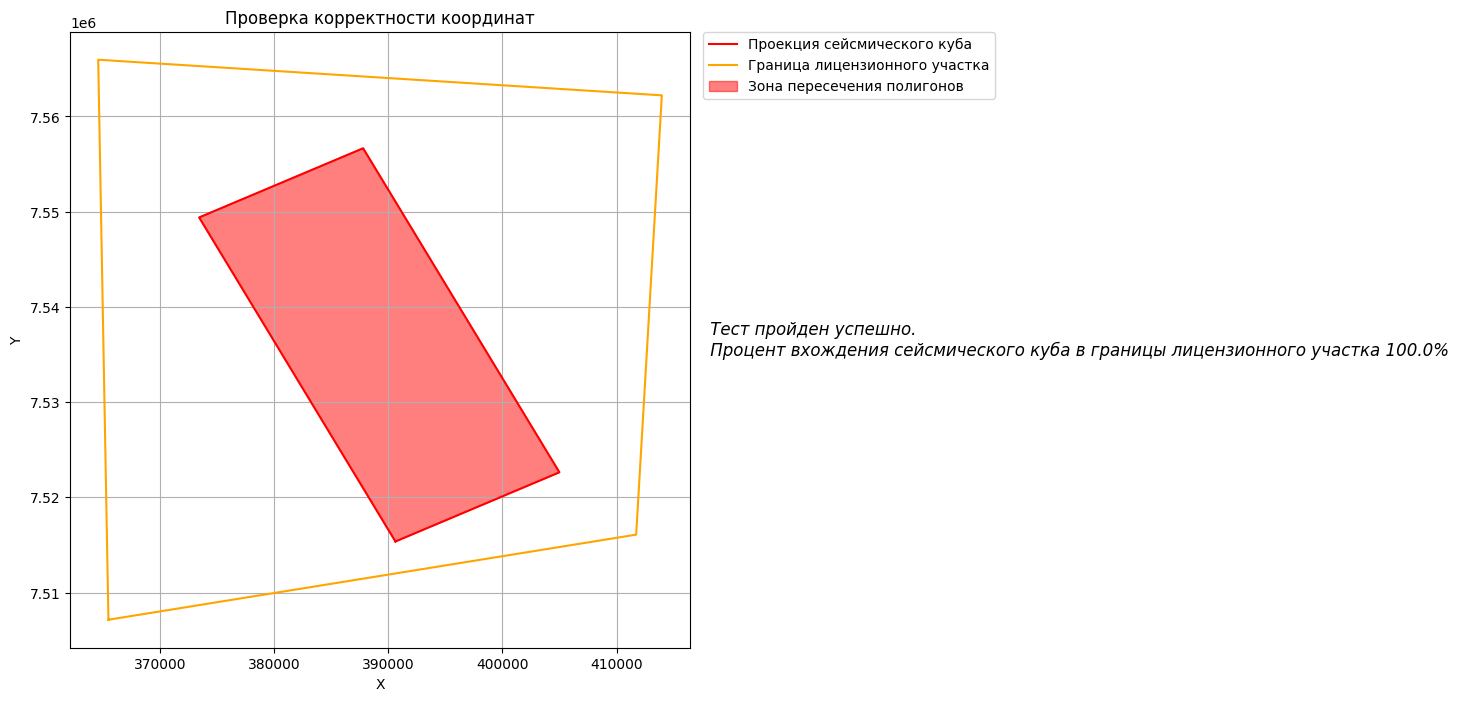

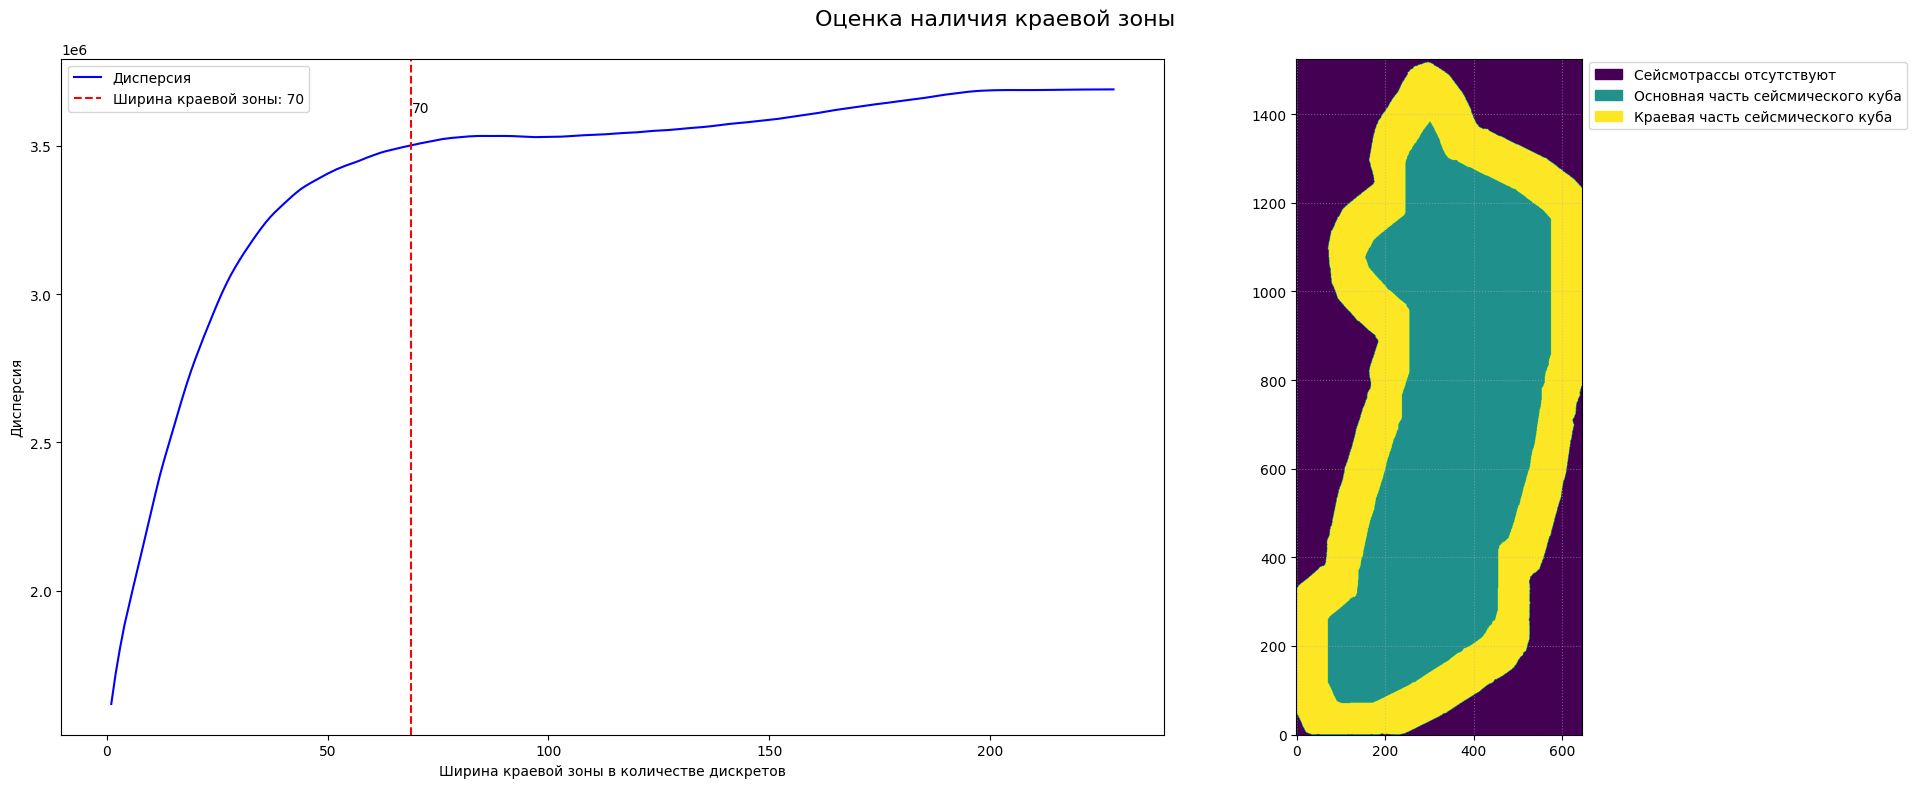


     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 52.63% точек разлома из 19 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 75.0% точек разлома из 20 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_7_[Depth_1]"; 54.55% точек разлома из 11 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_8_[Depth_1]"; 50.0% точек разлома из 10 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_9_[Depth_1]"; 50.0% точек разлома из 18 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом

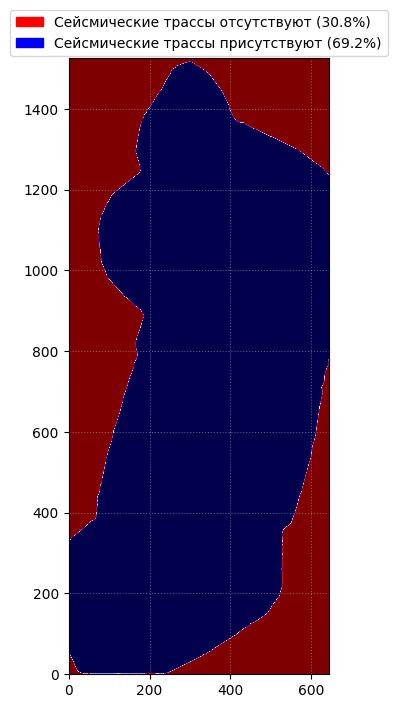


     Тест пройден успешно. 
     Отметки оси глубин/времени монотонно возрастают

     Тест не пройден.
     Путь к файлу:"data/seismic_data/TWT_NP4"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)

     Отсутствуют данные для проведения теста.
     Некорректный путь к файлу:"data/seismic_data/TWT_NP"


In [7]:
result = seism_data_qa_qc.start_tests(test_names)

In [8]:
result

{'test_coordinate_validation': {'result': 'True',
  'file_name': 'Глубинный куб NP cropped',
  'date': '2023-08-25 16:04:49'},
 'test_edge_zone_evaluation': {'variance_list': [1617508.8,
   1720421.2,
   1807432.1,
   1884600.1,
   1949360.9,
   2013024.6,
   2075065.0,
   2137319.0,
   2200857.5,
   2263626.0,
   2326916.2,
   2387554.8,
   2441871.5,
   2492998.5,
   2543889.5,
   2593957.8,
   2644352.8,
   2692625.2,
   2737771.0,
   2779641.8,
   2818822.2,
   2857315.0,
   2894489.5,
   2930707.8,
   2966736.2,
   3001044.5,
   3032519.0,
   3062020.8,
   3088483.8,
   3113355.0,
   3137023.2,
   3159292.5,
   3181224.5,
   3202388.2,
   3222622.2,
   3241996.2,
   3259375.0,
   3275214.0,
   3289502.0,
   3303326.2,
   3317161.2,
   3330515.2,
   3343180.2,
   3354841.5,
   3364484.0,
   3373465.5,
   3381891.5,
   3389975.2,
   3398146.0,
   3406189.0,
   3413599.2,
   3420620.2,
   3426761.5,
   3432685.0,
   3438011.8,
   3442996.2,
   3448651.8,
   3454779.0,
   3460760.8,
 

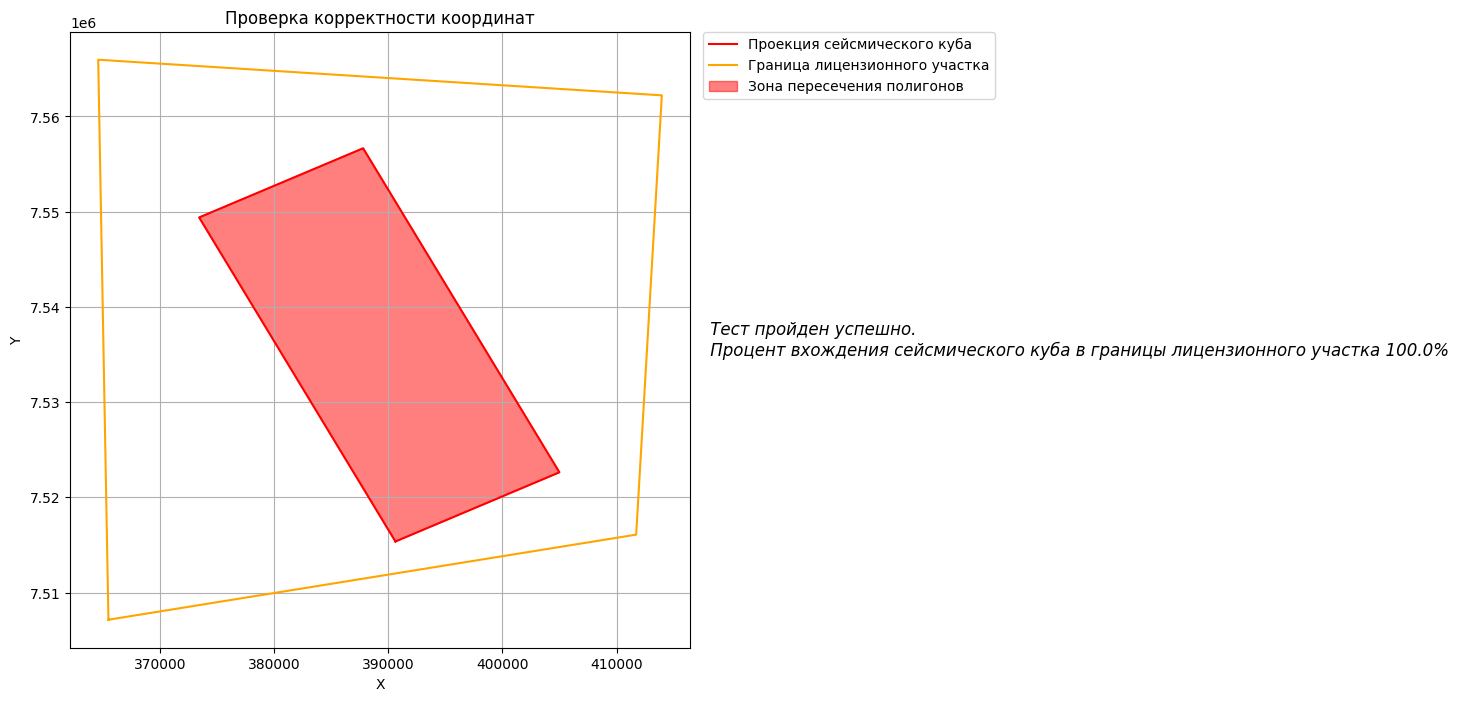

{'result': 'True',
 'file_name': 'Глубинный куб NP cropped',
 'date': '2023-08-25 16:05:49'}

In [9]:
seism_data_qa_qc.test_coordinate_validation()

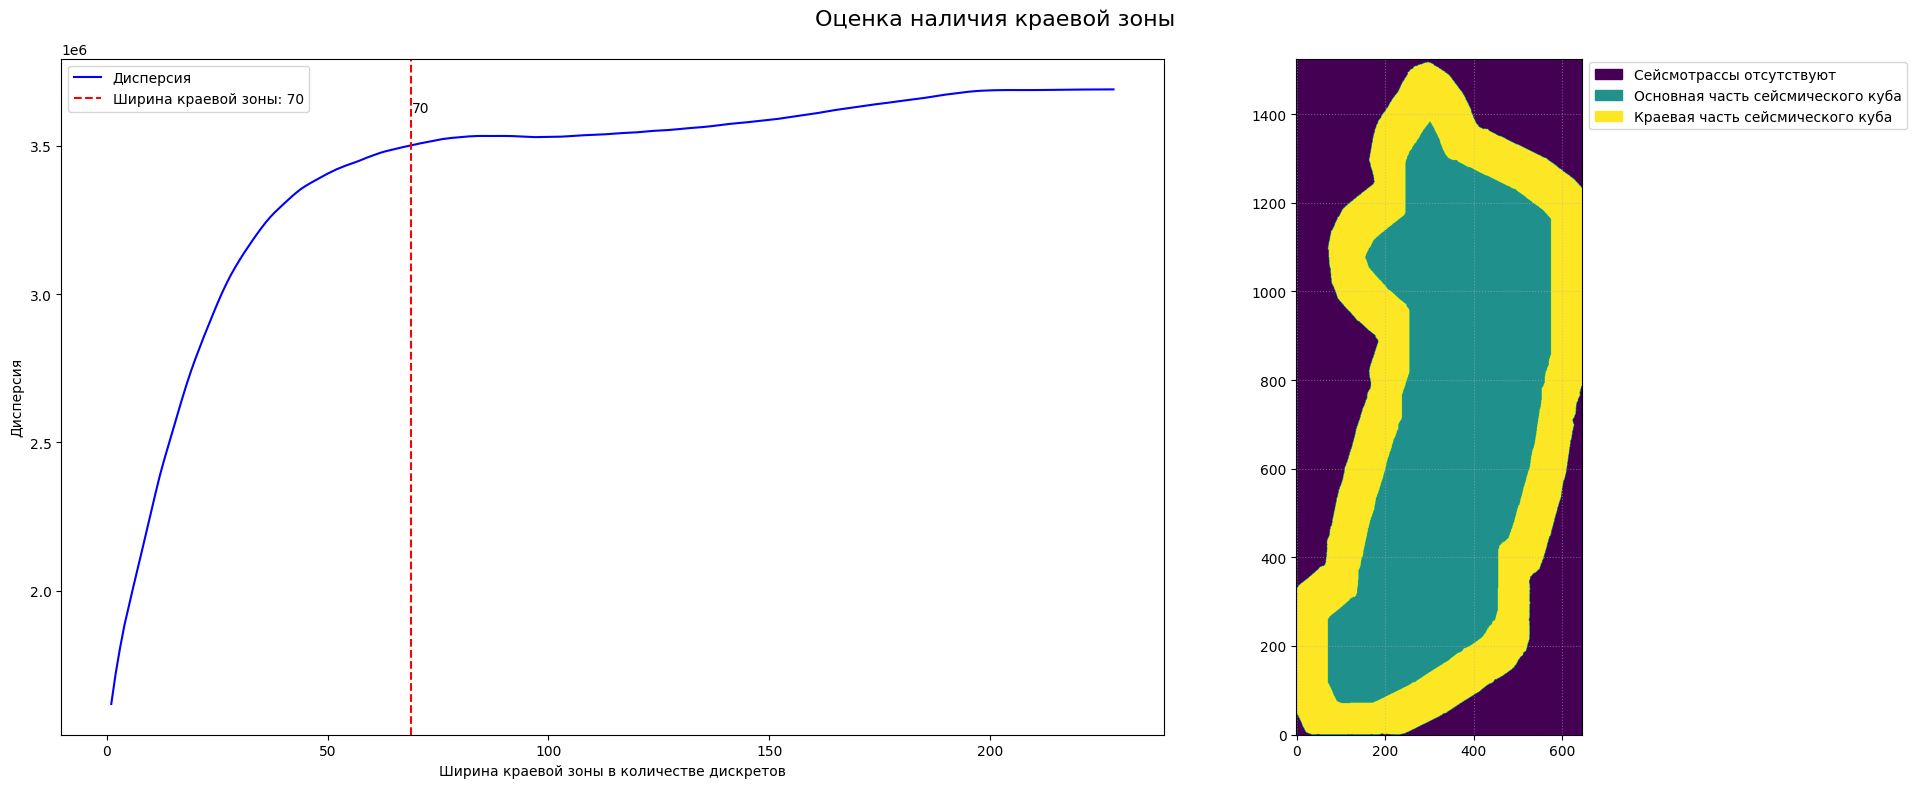

{'variance_list': [1617508.8,
  1720421.2,
  1807432.1,
  1884600.1,
  1949360.9,
  2013024.6,
  2075065.0,
  2137319.0,
  2200857.5,
  2263626.0,
  2326916.2,
  2387554.8,
  2441871.5,
  2492998.5,
  2543889.5,
  2593957.8,
  2644352.8,
  2692625.2,
  2737771.0,
  2779641.8,
  2818822.2,
  2857315.0,
  2894489.5,
  2930707.8,
  2966736.2,
  3001044.5,
  3032519.0,
  3062020.8,
  3088483.8,
  3113355.0,
  3137023.2,
  3159292.5,
  3181224.5,
  3202388.2,
  3222622.2,
  3241996.2,
  3259375.0,
  3275214.0,
  3289502.0,
  3303326.2,
  3317161.2,
  3330515.2,
  3343180.2,
  3354841.5,
  3364484.0,
  3373465.5,
  3381891.5,
  3389975.2,
  3398146.0,
  3406189.0,
  3413599.2,
  3420620.2,
  3426761.5,
  3432685.0,
  3438011.8,
  3442996.2,
  3448651.8,
  3454779.0,
  3460760.8,
  3466361.5,
  3471572.0,
  3476695.8,
  3481099.0,
  3484738.8,
  3488339.0,
  3491964.5,
  3495380.0,
  3498711.5,
  3501796.5,
  3505108.2,
  3508322.5,
  3511262.0,
  3514303.2,
  3517157.5,
  3519985.0,
  352271

In [10]:
seism_data_qa_qc.test_edge_zone_evaluation()

In [11]:
seism_data_qa_qc.test_faults_location_validation()


     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 52.63% точек разлома из 19 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 75.0% точек разлома из 20 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_7_[Depth_1]"; 54.55% точек разлома из 11 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_8_[Depth_1]"; 50.0% точек разлома из 10 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_9_[Depth_1]"; 50.0% точек разлома из 18 входит в границы сейсмического куба

     Тест пройден успешно.
     Разлом

{'data availability': True,
 'Fault_Ok_Jra_kust14_2_[Depth_1]': {'income_points_percent': 52.63},
 'Fault_Ok_Jra_kust14_4_[Depth_1]': {'income_points_percent': 75.0},
 'Fault_Ok_Jra_kust14_5_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_6_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_7_[Depth_1]': {'income_points_percent': 54.55},
 'Fault_Ok_Jra_kust14_8_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_9_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_10_[Depth_1]': {'income_points_percent': 55.0},
 'Fault_Ok_NP_Jra_kust11_11_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_14_[Depth_1]': {'income_points_percent': 68.75},
 'Fault_Ok_NP_Jra_kust11_15_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_1_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_2_[Depth_1]': {'income_points_percent': 72.73},
 'Fault_Ok_NP_Jra_kust11_3_[Depth_1]': {'income_p

In [12]:
seism_data_qa_qc.test_surfaces_location_validation()


     Тест не пройден.
     Путь к файлу:"data/seismic_data/TWT_NP4"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)

     Отсутствуют данные для проведения теста.
     Некорректный путь к файлу:"data/seismic_data/TWT_NP"


{'data availability': True,
 'TWT_NP4': {'x_y_coords_validation': 'True', 'z_coords_validation': 'False'},
 'TWT_NP': {'x_y_coords_validation': 'Fail', 'z_coords_validation': 'Fail'},
 'date': '2023-08-25 16:06:48'}

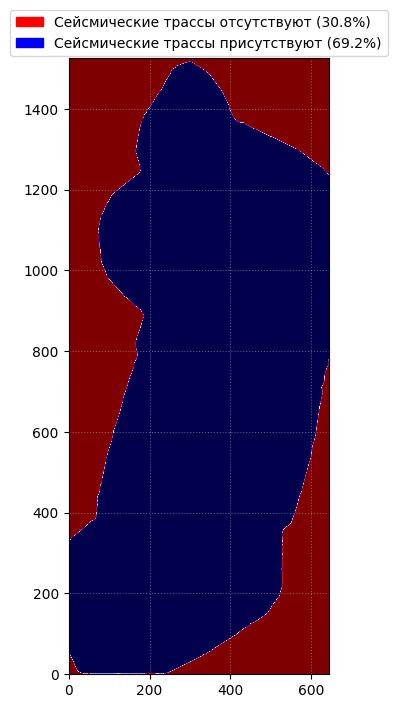

{'result': False,
 'wrong_values': array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 'file_name': 'Глубинный куб NP cropped',
 'date': '2023-08-25 16:06:48'}

In [13]:
seism_data_qa_qc.test_miss_traces()

In [14]:
seism_data_qa_qc.test_monotony()


     Тест пройден успешно. 
     Отметки оси глубин/времени монотонно возрастают


{'result': True,
 'wrong_values': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'file_name': 'Глубинный ку

In [15]:
seism_data_qa_qc.generate_test_report(file_name='test_report_seismic')